- **Purpose:** Practice the codes in chapter 3 of the materials
- **Date:** July 24, 2025

# 1. Random and Non-random Normal Samples

In [1]:
# Libraries
library(tidyverse)
library(tibble)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Set seed for reproducibility
set.seed(41)

In [3]:
# Look at rnorm function
?rnorm

In [4]:
# Random normal sampling
n_samples <- 50
rnorm_samples <- rnorm(n_samples, mean = 0, sd = 1)
rnorm_samples[1:5]

[1]  0.9057534  0.4936675  0.5992858 -1.5796070  1.0006207

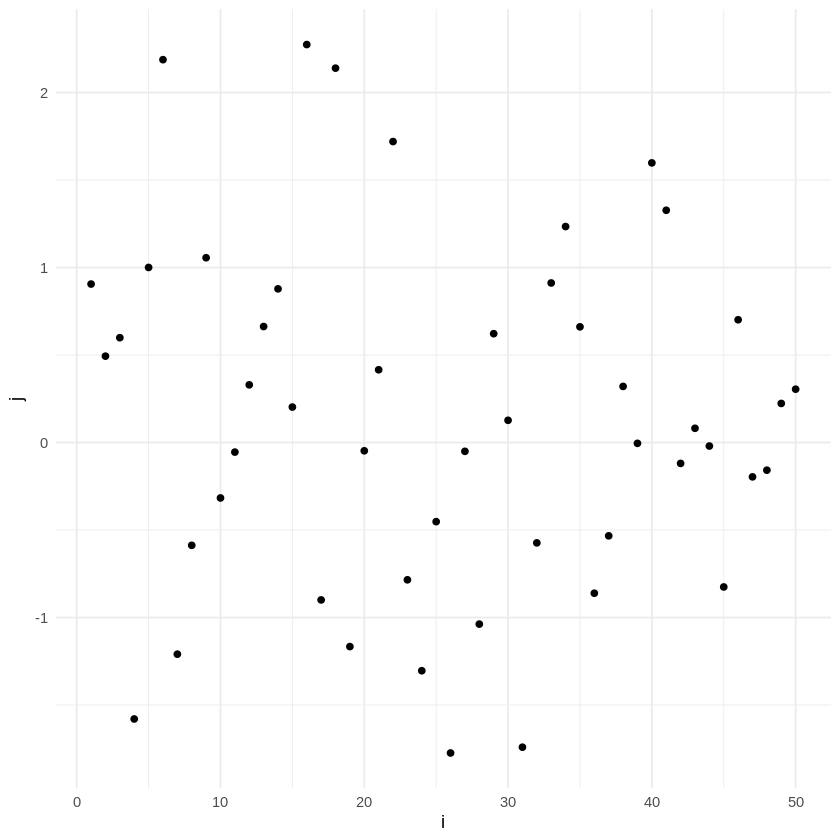

In [5]:
# Plot
rnorm_samples |>
  enframe() |> # put the values in a tibble
  ggplot() +
  geom_point(aes(x = name, y = value)) +
  labs(x = "i", y = "j") +
  theme_minimal()

**mean-shift:** random variables are independent but distributed with a different mean

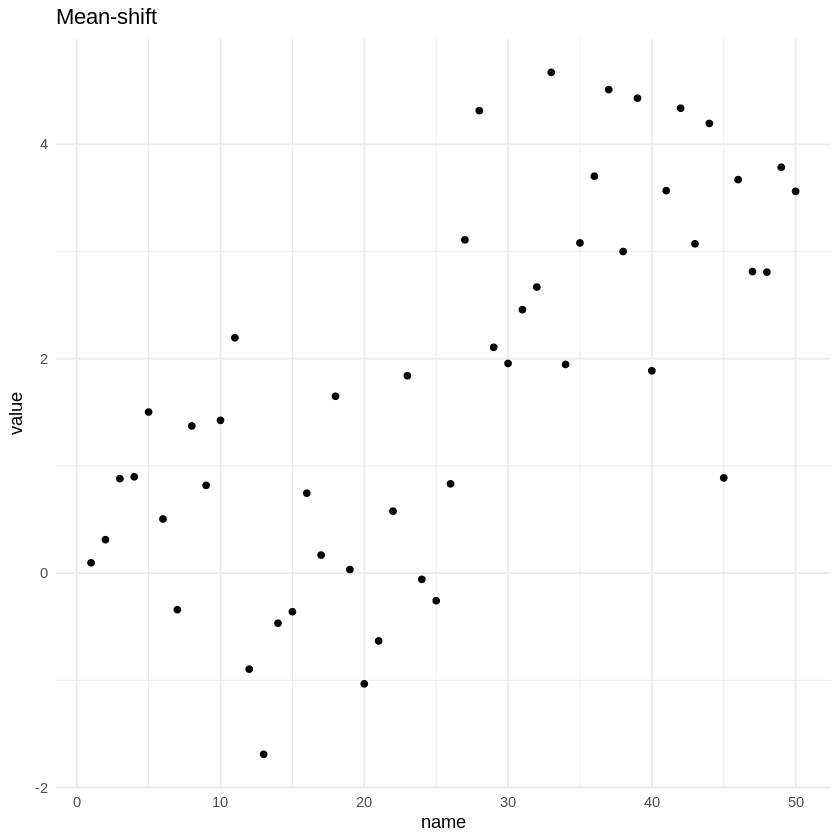

In [6]:
# Sampling with 50% standard normal and 50% with mean = 3, sd = 1

## function for making the plot
plot_samples <- function(x, title = NULL, xlab = NULL, ylab = NULL){
  plt <- x |>
    enframe() |>
    ggplot() +
    geom_point(aes(x = name, y = value)) +
    labs(title = title, xlab = xlab, ylab = ylab) +
    theme_minimal()
  return(plt)
}
ms_samples <- c(rnorm(floor(n_samples/2)), rnorm(n_samples - floor(n_samples/2), 3))
plot_samples(ms_samples, xlab = "x_i", ylab = "y_i", title = "Mean-shift")


**mean-drift:** mean changes from variable to variable

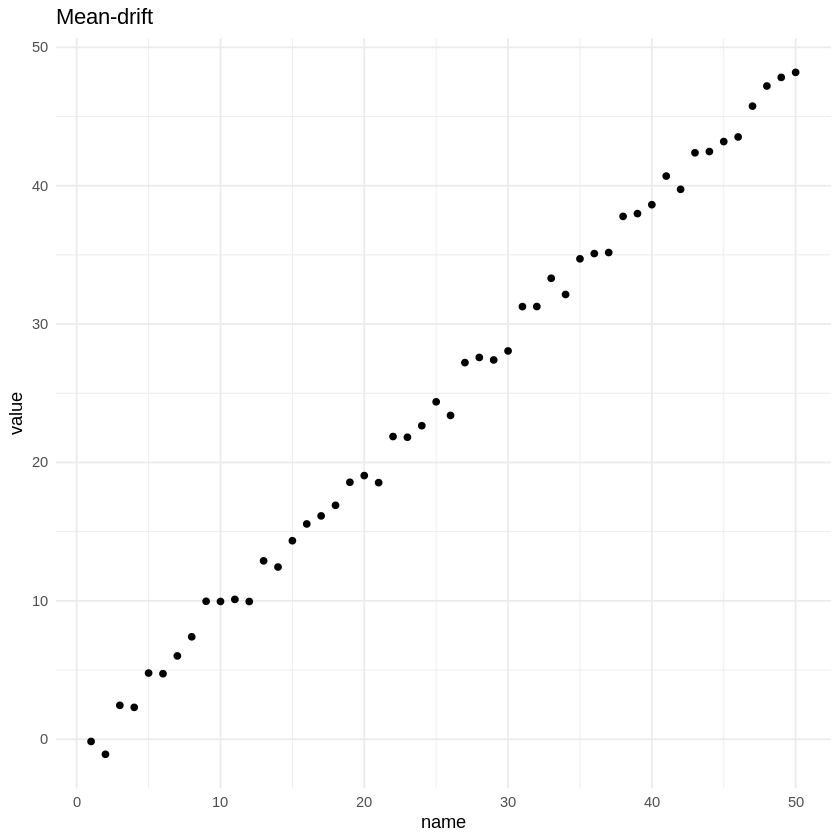

In [7]:
# Mean is a range vector
md_samples <- rnorm(n_samples, 0:(n_samples - 1))
plot_samples(md_samples, title = "Mean-drift", xlab = "x_i", ylab = "y_i")

**variance-shift** and **variance-drift** ==> these are the same concepts as their mean conterparts.

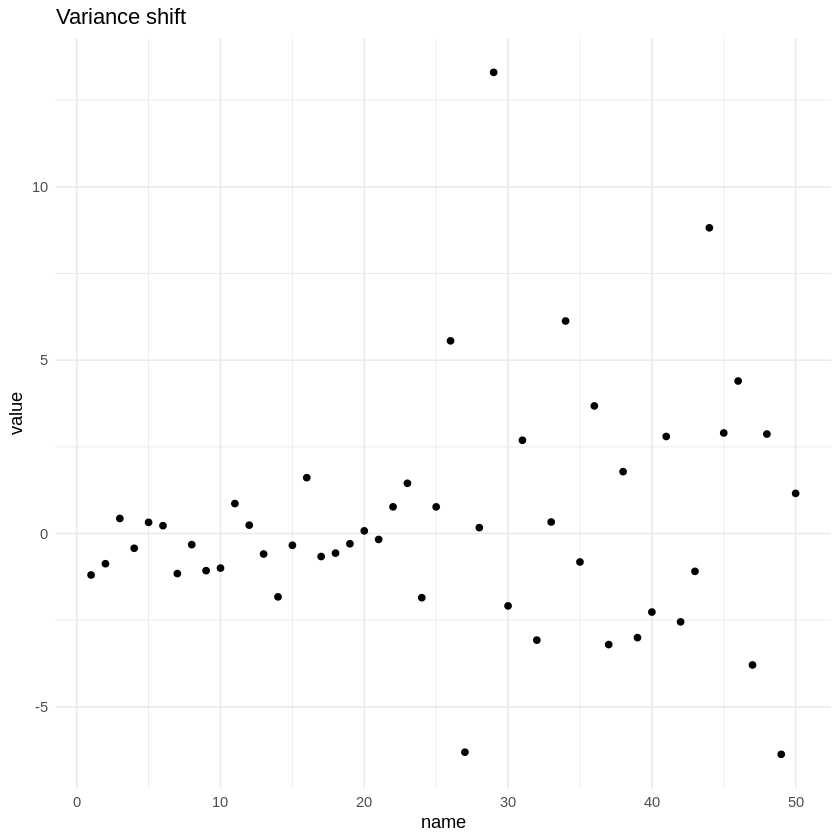

In [8]:
# Variance shift
vs_samples <- c(
  rnorm(floor(n_samples/2)),
  rnorm(n_samples - floor(n_samples/2), sd=4)
)
plot_samples(vs_samples, title = "Variance shift", xlab = "x_i", ylab = "y_i")

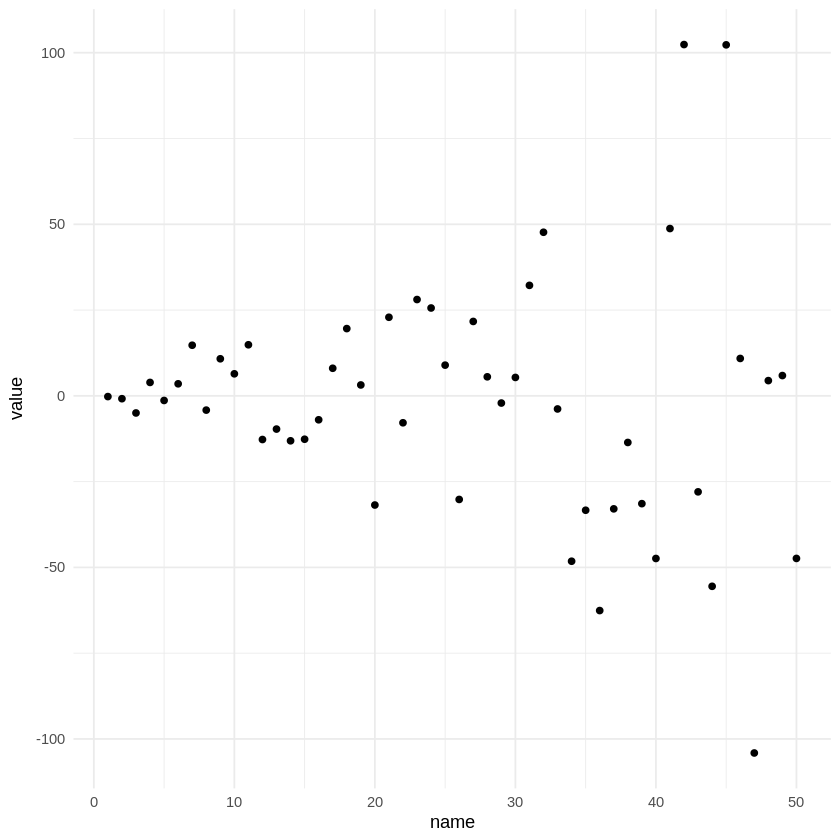

In [9]:
# Variance drift
vd_samples <- rnorm(n_samples, sd=1:n_samples)
plot_samples(vd_samples)

## 1.1 Autocorrelated sample

In [10]:
# Look at diff function
?diff

In [11]:
# Auto-correlated sample generation
y <- rnorm(n_samples)
auto_sample <- y |>
  diff()

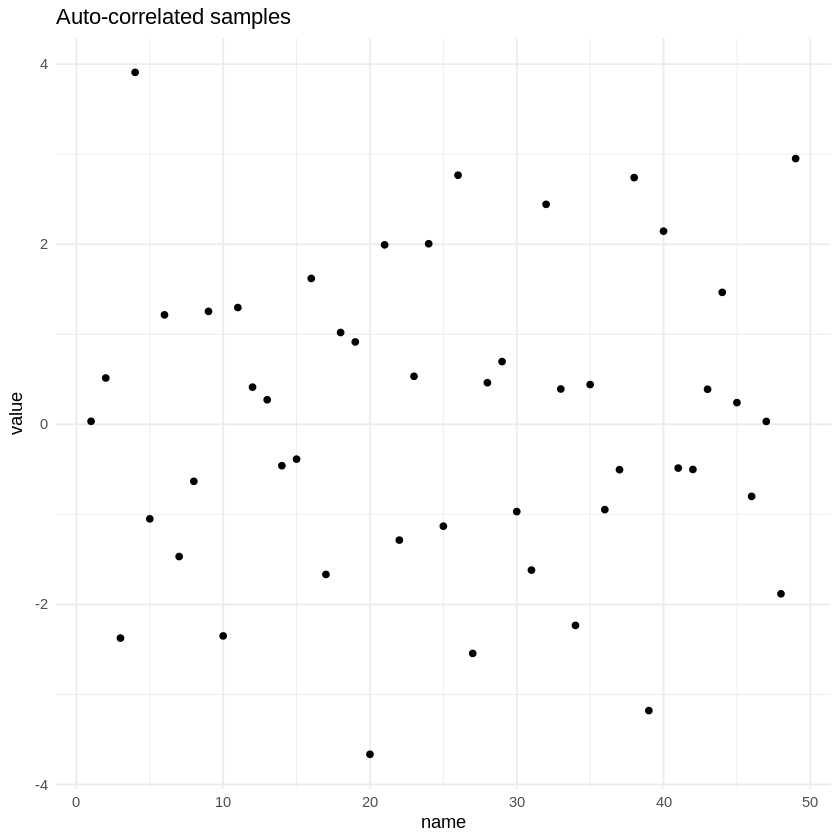

In [12]:
# Plot the auto_sample
plot_samples(auto_sample, title = "Auto-correlated samples")

# 2. Multivariate normal distribution

In [13]:
# mvtnorm package
install.packages("mvtnorm")
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
# Simulating bivariate normal random variable
m <- rep(0, 2) # mean of both variables is zero
vcov_mat <- matrix(c(1, 1, 1, 3), nrow = 2) # variance-covariance matrix
bvt_samples <- mvtnorm::rmvnorm(n_samples, m, vcov_mat)
head(bvt_samples, 10)

-2.3530194,-4.53693660
-0.1529196,0.99705181
1.5072262,0.54102370
-0.4109108,2.25893779
0.6140206,1.41507768
0.4966130,0.81455944
-0.4189195,0.54099987
-0.2549073,0.26391315
0.2637501,0.08799403
-0.5924425,-3.41003571


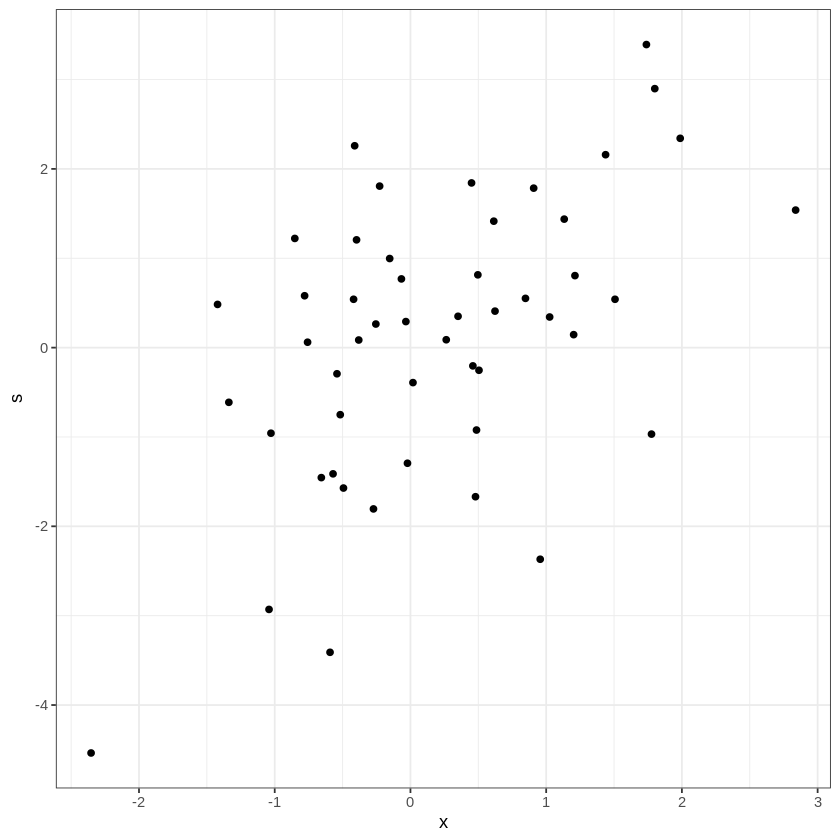

In [17]:
# Scatter plot
bvt_tbl <- tibble( # make a tibble with the values for the two random variables
  x = bvt_samples[, 1], s = bvt_samples[, 2]
)

bvt_tbl |>
  ggplot() +
  geom_point(aes(x, s)) +
  theme_bw()

In [18]:
# expand.grid function
?expand.grid

In [19]:
# seq function
?seq

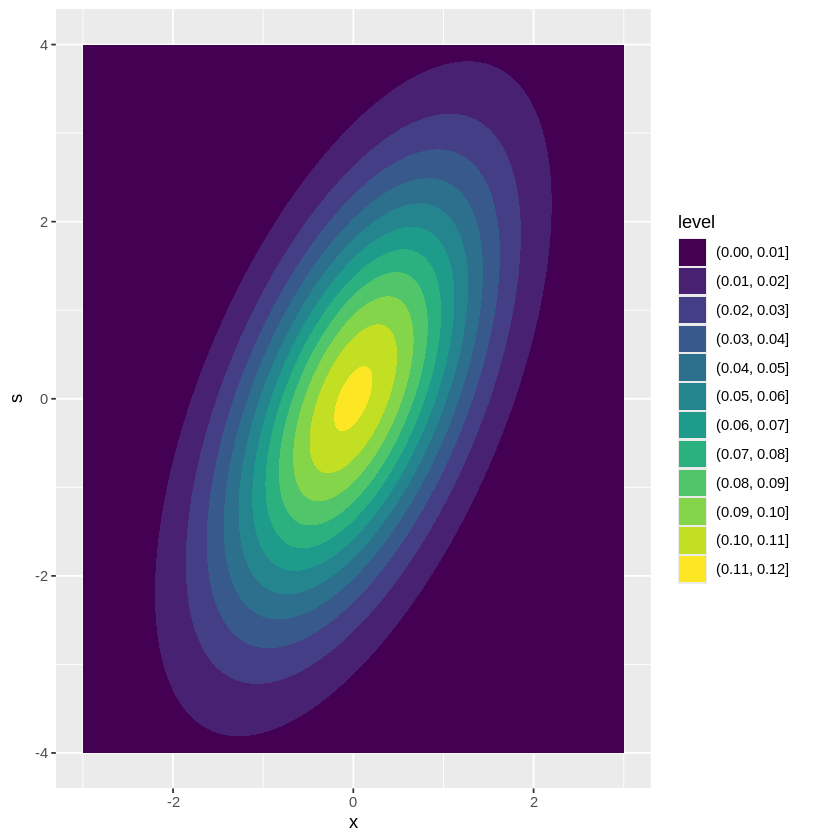

In [24]:
# Plotting the true distribution
bvt_grid <- expand.grid(
  x = seq(-3, 3, length.out = 200),
  s = seq(-4, 4, length.out = 200)
)

# Compute the density of each coordinate
probs <- dmvnorm(bvt_grid, m, vcov_mat)

bvt_grid |>
  mutate(prob = probs) |>
  ggplot() +
  geom_contour_filled(aes(x, s, z=prob))

# Exercises

In [25]:
# P(X < 0 intersection S < 0)
pmvnorm(upper = c(0, 0), mean = m, sigma = vcov_mat)

[1] 0.3479566
attr(,"error")
[1] 1e-15
attr(,"msg")
[1] "Normal Completion"

In [26]:
# Solve the same problem using Monte-Carlo simulation
sim_res <- rmvnorm(1000000, mean = m, sigma = vcov_mat) # simulation results
mean(sim_res[, 1] < 0 & sim_res[, 2] < 0)

[1] 0.348012

In [30]:
# P(X > 1 intersection S < 0) by simulation
mean(sim_res[, 1] > 1 & sim_res[, 2] < 0)

[1] 0.02422

In [31]:
# The same thing as before but using pmvnorm
pmvnorm(lower = c(1, -Inf), upper = c(Inf, 0), mean=m, sigma=vcov_mat)

[1] 0.0240375
attr(,"error")
[1] 1e-15
attr(,"msg")
[1] "Normal Completion"

In [32]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] mvtnorm_1.3-3   lubridate_1.9.4 forcats_1.0.0   stringr_1.5.1  
 [5] dplyr_1.1.4     purrr_1.1.0     readr_2.1.5     tidyr_1.3.1    
 [9] tibble_3.3.0    ggplot2_3.5.2   tidy